### Counting Images in Training and Testing Sets

In the grand adventure of machine learning, data is my trusty sidekick. This code helps me count the number of images in my training and testing datasets—because who doesn't love a good tally?

First, I import the `os` module to navigate my file directories like a pro. Essential stuff! Then, I define where my data lives—`train_dir` for training and `test_dir` for testing. Think of it as choosing my battlefield.

Next, I count the images in each class (Normal and Pneumonia) for training. After all, I can’t train a model on an empty stomach... I mean, dataset! I do a similar deal for the testing set because I need enough images to properly test my model, just like giving a student a surprise quiz to check their knowledge.

Finally, I print the counts in an easy-to-read format, giving me a quick overview of my dataset. It’s like getting a report card, but for images!

By keeping tabs on these counts, I ensure my model has a fair shot at success. Here’s to my dataset—may it lead me to better predictions!

In [1]:
import os

# Define paths
train_dir = 'Train'
test_dir = 'Test'

# Count the number of images in each class in the training set
train_normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

# Count the number of images in each class in the test set
test_normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

# Print the counts
print(f"Training Set - Normal: {train_normal_count}, Pneumonia: {train_pneumonia_count}")
print(f"Test Set - Normal: {test_normal_count}, Pneumonia: {test_pneumonia_count}")

Training Set - Normal: 1342, Pneumonia: 3876
Test Set - Normal: 234, Pneumonia: 390


### Calculating Image Proportions in Training and Testing Sets

Now that I know how many images I have, it's time to figure out the proportions. After all, I need to see if my dataset is balanced, or if it’s favoring one class like a teacher’s pet!

First, I calculate the total number of images in both the training and testing sets. This is where I add up the counts of Normal and Pneumonia images, because who doesn’t love a good sum?

Next, I calculate the class proportions for each set. I divide the count of Normal and Pneumonia images by the total number of images and then multiply by 100 to get a nice percentage. This gives me the proportions for the training set and the testing set, making it super easy to visualize how my dataset is split.

Finally, I print the proportions with two decimal places, so I can see the exact distribution of classes. This helps me determine if I need to balance my dataset or if I’m ready to train my model without a lopsided view of the world. It’s like checking the ingredients before baking a cake—too much of one thing can spoil the fun!

In [2]:
# Calculate total images in training and test sets
total_train_images = train_normal_count + train_pneumonia_count
total_test_images = test_normal_count + test_pneumonia_count

# Calculate class proportions
train_normal_proportion = train_normal_count / total_train_images * 100
train_pneumonia_proportion = train_pneumonia_count / total_train_images * 100

test_normal_proportion = test_normal_count / total_test_images * 100
test_pneumonia_proportion = test_pneumonia_count / total_test_images * 100

# Print the proportions
print(f"Training Set - Normal: {train_normal_proportion:.2f}%, Pneumonia: {train_pneumonia_proportion:.2f}%")
print(f"Test Set - Normal: {test_normal_proportion:.2f}%, Pneumonia: {test_pneumonia_proportion:.2f}%")

Training Set - Normal: 25.72%, Pneumonia: 74.28%
Test Set - Normal: 37.50%, Pneumonia: 62.50%


### Data Augmentation: Because More Data Is Always Better!

In this code, I'm using `ImageDataGenerator` from TensorFlow to jazz up my training data. 

1. **Normalization**: 
   - `rescale=1.0/255.0`: I turn those pixel values from a party of 0-255 to a classy 0-1 range. Who knew pixels could be so refined?

2. **Random Transformations**: 
   - **Rotation**: `rotation_range=20`: I rotate images by up to 20 degrees. Let’s pretend my patients have a taste for the dramatic!
   - **Shifts**: `width_shift_range=0.1` & `height_shift_range=0.1`: I shift images horizontally and vertically by 10%. Because nothing says “realistic” like a sideways chest X-ray!
   - **Shear**: `shear_range=0.2`: I slant those images a bit—why not?
   - **Zoom**: `zoom_range=0.2`: Let’s get a closer look at those lungs—no need to be shy!
   - **Flip**: `horizontal_flip=True`: I flip images horizontally. Apparently, pneumonia can appear from both sides!

3. **Test Set**: 
   - `test_datagen`: Just a plain rescaling here. I want my test images to be well-behaved—no party tricks allowed!

In short, this is how I make sure my model doesn't just memorize the training data but learns to recognize pneumonia like a pro, no matter how the images decide to pose!

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Normalize pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images in the range (degrees)
    width_shift_range=0.1,   # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    shear_range=0.2,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,         # Randomly zoom into images
    horizontal_flip=True,    # Randomly flip images
    fill_mode='nearest'      # Fill in newly created pixels
)

# Define data generator for the test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

### Custom Data Generator: Making Class Imbalance a Little Less Painful

In this code, I'm crafting a custom data generator to handle my training and testing data while keeping class weights in mind. Because let's face it, class imbalance is like that friend who always shows up uninvited!

1. **Imports**:
   - `import numpy as np`: Just a little NumPy magic for handling arrays.
   - `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: Using TensorFlow's `ImageDataGenerator` for image processing. It’s like my secret weapon for data augmentation!
   - `from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau`: I’m ready with callbacks to keep my model in check during training.

2. **Custom Data Generator Class**:
   - `class CustomDataGenerator`: This class takes in a generator and class weights, allowing me to create batches that consider class imbalance.
   - `__init__`: Initializes the generator and class weights—because starting strong is key!
   - `flow()`: This method runs an infinite loop:
     - **Batch Retrieval**: It fetches the next batch of images and labels from the original generator.
     - **Weights Calculation**: I create a weights array based on the labels. This way, I can help the model pay more attention to the underrepresented class—like giving extra snacks to the shy kid at the party!

3. **Class Weights**:
   - `class_weights = {0: 1.0, 1: train_normal_count / train_pneumonia_count}`: Here, I define class weights to give the pneumonia class a boost. Because, let’s be honest, it needs all the help it can get!

4. **Test Generator**:
   - `test_gen`: I create a test generator with no shenanigans—just resizing images and keeping them in order. 

5. **Training Generator**:
   - `train_gen`: I set up my training generator with the `train_datagen` to feed images to my model while maintaining a fun random shuffle.

6. **Total Steps Calculation**:
   - Using `math.ceil`, I calculate how many steps I'll take during training and testing. This ensures I’m not left high and dry without the correct number of batches!

And that’s it! This custom data generator is like my trusty sidekick, making sure the model learns properly and doesn’t get too cozy with any particular class!

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

class CustomDataGenerator:
    def __init__(self, generator, class_weights):
        self.generator = generator
        self.class_weights = class_weights

    def flow(self):
        while True:
            # Get the next batch of data
            x, y = self.generator.__next__()

            # Create a weights array based on the labels
            # Make sure to round the labels to get the correct indices
            weights = np.array([self.class_weights[int(label)] for label in y])

            yield x, (y, weights)

# Define the class weights
class_weights = {0: 1.0, 1: train_normal_count / train_pneumonia_count}

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary',      # Binary classification
    shuffle=False
)

# Use the existing train_datagen and test_datagen to create generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Create the custom generator
custom_train_gen = CustomDataGenerator(train_gen, class_weights)

import math
# Calculate total images in each generator
train_steps = math.ceil(train_gen.samples / train_gen.batch_size)
test_steps = math.ceil(test_gen.samples / test_gen.batch_size)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


### Building a VGG16 Model: The Elegant Approach to Pneumonia Detection

In this code snippet, I'm setting up a VGG16 model to tackle the pneumonia detection challenge. Let’s break down the components in a not-so-boring way:

1. **Imports**:
   - `import tensorflow as tf`: Importing TensorFlow, the backbone of my deep learning adventures!
   - `from tensorflow.keras.applications import VGG16`: Bringing in the pre-trained VGG16 model because who doesn’t love a good shortcut?
   - `from tensorflow.keras.models import Sequential`: I’m going for a straightforward model architecture.
   - `from tensorflow.keras.layers import Flatten, Dense, Dropout`: Adding some layers to spice things up—flattening the output, making dense connections, and sprinkling in dropout for regularization.
   - `from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau`: Just in case I need to rein in my model during training!

2. **Class Weights**:
   - `class_weights`: I’m defining class weights to give the pneumonia class a little extra attention:
     - `0: train_normal_count / total_train_images`: For normal cases, because they have a healthy representation.
     - `1: train_pneumonia_count / total_train_images`: For pneumonia cases, making sure they don’t get overlooked—like that last slice of pizza everyone ignores!

3. **Loading VGG16**:
   - `base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))`: Loading VGG16 with ImageNet weights, but skipping the top layers. This model is like a seasoned chef who’s ready to cook but needs a little help with the final dish.

4. **Freezing Layers**:
   - `for layer in base_model.layers: layer.trainable = False`: I’m freezing the base model layers so they don't get updated during the initial training. Gotta respect the expertise!

5. **Creating the Model**:
   - `model = Sequential([...])`: I’m layering on my architecture:
     - `base_model`: The star of the show!
     - `Flatten()`: Turning that multi-dimensional output into a flat array, ready for some dense action.
     - `Dense(256, activation='relu')`: A dense layer to add complexity and learn non-linear relationships.
     - `Dropout(0.5)`: Adding dropout to help with overfitting. It’s like giving my model a little vacation during training!
     - `Dense(1, activation='sigmoid')`: The final output layer for binary classification—normal or pneumonia, let’s get to the point!

6. **Compiling the Model**:
   - `model.compile(...)`: I’m setting up the optimizer (Adam for smooth sailing), loss function (binary cross-entropy for my binary classification), and metrics (accuracy to track performance).

7. **Model Summary**:
   - `model.summary()`: I print out the model summary because I like to show off the architecture and see what I’ve built!

And there you have it! A well-structured VGG16 model ready to tackle pneumonia detection like a pro.

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define class weights correctly
class_weights = {0: train_normal_count / total_train_images,  # Normal
                 1: train_pneumonia_count / total_train_images}  # Pneumonia

# Load the VGG16 model with pre-trained weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent them from being trained initially
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Training with Style: Early Stopping and Learning Rate Reduction

In this block, I'm giving my model a little extra guidance during training to ensure it performs at its best. Let’s dive in:

1. **Callbacks Defined**:
   - `early_stopping`: This is my safety net. By monitoring `val_loss`, I’m saying, “If this loss doesn’t improve for 5 epochs (patience), just stop training and restore the best weights.” It’s like telling my model, “Don’t push it if you’re not improving!” This helps prevent overfitting—no one likes to see a model that's all talk and no results.
   - `reduce_lr`: This callback is my model’s personal coach for adjusting learning rates. If the `val_loss` plateaus, it reduces the learning rate by a factor of 0.2 (that’s a big cut!) after 3 epochs of no improvement, but it won't drop below `1e-6`. It’s like saying, “If you’re not learning, let’s slow down and reassess.”

2. **Training the Model**:
   - `history = model.fit(...)`: Here’s where the magic happens! I’m training the model with the following specifications:
     - `custom_train_gen.flow()`: Using my custom data generator, because I like to keep things interesting.
     - `steps_per_epoch=train_steps`: Defining how many batches to run through in each epoch. It’s like saying, “Let’s have a productive day!”
     - `validation_data=test_gen`: I’ll also validate against my test data to see how well I’m doing. Gotta keep my eye on the competition!
     - `validation_steps=test_steps`: Setting the number of validation batches. It’s just the right amount of pressure to keep me sharp!
     - `epochs=10`: I’m starting with 10 epochs for training. Adjusting this is totally my call based on how eager I am for results!
     - `callbacks=[early_stopping, reduce_lr]`: I’m employing my trusty callbacks to keep things on track.

And there it is! With these strategies in place, I’m all set to train my model effectively and avoid the pitfalls of overfitting and learning rate mishaps. Let’s get to it!

In [6]:
# Define EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Training the model
history = model.fit(
    custom_train_gen.flow(),
    steps_per_epoch=train_steps,
    validation_data=test_gen,
    validation_steps=test_steps,
    epochs=10,  # Adjust epochs based on your requirements
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8575 - loss: 0.4039 

D:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 2809s 17s/step - accuracy: 0.8578 - loss: 0.4031 - val_accuracy: 0.8990 - val_loss: 0.2599 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.9368 - loss: 0.1724 

D:\Anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2468s 15s/step - accuracy: 0.9368 - loss: 0.1724 - learning_rate: 0.0010
Epoch 3/10


D:\Anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
D:\Anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2290s 14s/step - accuracy: 0.9360 - loss: 0.1743 - val_accuracy: 0.9038 - val_loss: 0.2706 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1206s 7s/step - accuracy: 0.9353 - loss: 0.1652 - learning_rate: 0.0010
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1360s 8s/step - accuracy: 0.9356 - loss: 0.1679 - val_accuracy: 0.9103 - val_loss: 0.2306 - learning_rate: 0.0010
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1166s 7s/step - accuracy: 0.9411 - loss: 0.1557 - learning_rate: 0.0010
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1131s 7s/step - accuracy: 0.9356 - loss: 0.1600 - val_accuracy: 0.9167 - val_loss: 0.2814 - learning_rate: 0.0010
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 946s 6s/step - accuracy: 0.9460 - loss: 0.1548 - learning_rate: 0.0010
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1243s 8s/step - accuracy: 0.9474 - loss: 0.1379 - val_accuracy: 0.9135 - val_loss: 0.2610 - learning_rate: 0.0010
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1044s 6s/step - ac

### Evaluating Model Performance

Now it’s time to see how well my model performs on the test data. Let’s break it down:

1. **Predictions**:
   - I use the model to predict outcomes on the test data with `model.predict()`. This gives me the probabilities of each image being classified as pneumonia.
   - I convert these probabilities into class labels (0 for Normal and 1 for Pneumonia) using a simple rule: if the predicted probability is greater than **0.5**, I call it pneumonia; otherwise, it’s normal.

2. **Classification Report**:
   - I print a classification report that provides a comprehensive overview of how well my model performed, showing metrics like precision, recall, and F1 score. These metrics help me understand not just how many predictions were correct, but also how well the model identifies each class.

3. **Confusion Matrix**:
   - I create a confusion matrix that visually represents the number of correct and incorrect predictions. This matrix helps me see how many instances of each class were correctly identified versus misclassified.

4. **Performance Metrics**:
   - I calculate and print several important metrics:
     - **Accuracy**: The overall correctness of the model.
     - **Precision**: The proportion of true positive results (correct pneumonia predictions) among all positive predictions.
     - **Recall**: The proportion of true positives among all actual positives (how well the model captures pneumonia cases).
     - **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.

5. **ROC Curve and AUC**:
   - I plot the Receiver Operating Characteristic (ROC) curve, which illustrates the trade-off between true positive rates and false positive rates at various threshold settings. 
   - I also calculate the Area Under the Curve (AUC), a single metric that summarizes the model’s ability to discriminate between classes. A higher AUC indicates better model performance.

6. **Visualizing the Confusion Matrix**:
   - To make the confusion matrix easier to interpret, I plot it using a heatmap. This provides a clear visual representation of how the model's predictions compare to the actual labels, making it easier to spot patterns in misclassifications.

By going through these steps, I gain valuable insights into my model's strengths and weaknesses, allowing me to refine my approach for even better results in the future!

20/20 ━━━━━━━━━━━━━━━━━━━━ 146s 7s/step
Accuracy: 0.91
Precision: 0.89
Recall: 0.97
F1 Score: 0.93
Confusion Matrix:
[[189  45]
 [ 11 379]]


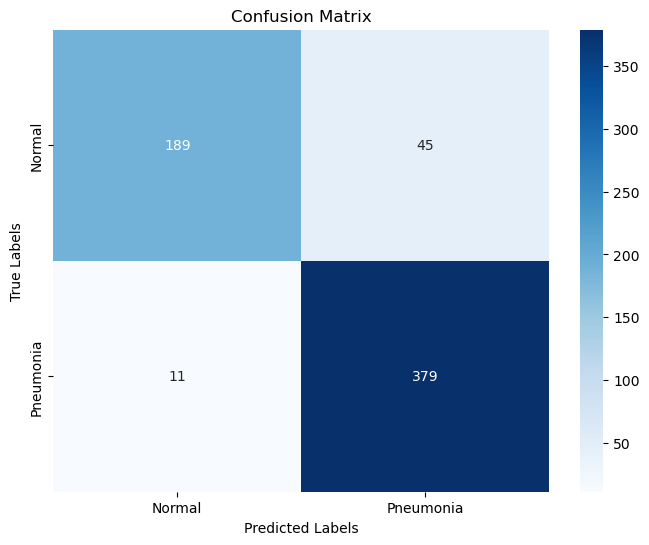

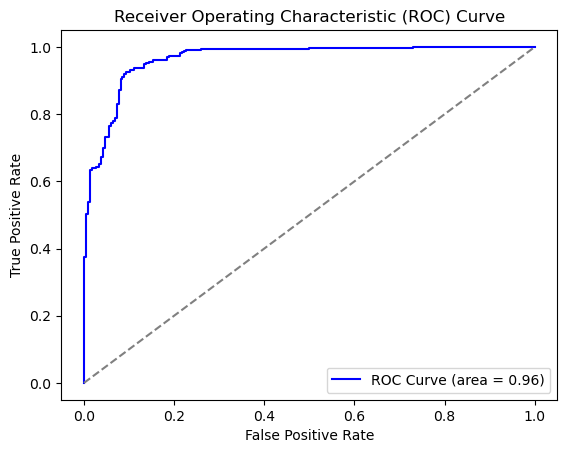

              precision    recall  f1-score   support

      Normal       0.94      0.81      0.87       234
   Pneumonia       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



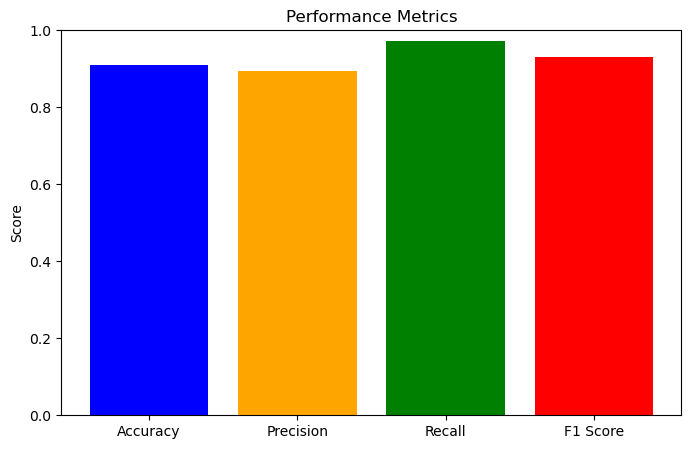

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_true` are true labels and `y_pred` are predicted labels
y_true = test_gen.classes  # Actual labels from the test set
y_pred = model.predict(test_gen)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

# 1. Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(f'Confusion Matrix:\n{cm}')

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 3. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Classification Report
print(classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia']))

# 5. Bar Plot for Accuracy, Precision, Recall, F1 Score
metrics = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()
